In [1]:
import torch
import torchaudio
import torchaudio.transforms as Trans 
import torchaudio.functional as Func 

/home/sunday1/anaconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt 
from torchaudio.utils import download_asset

# torch.random.manual_seed(0)

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

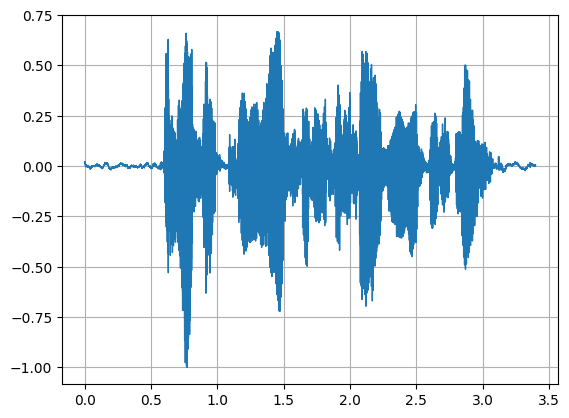

In [3]:
# WAV form in the time domain

SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)
# print(SPEECH_WAVEFORM)


def plot_waveform(waveform, sr):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    plt.show(block=False)

plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE)
Audio(SPEECH_WAVEFORM.numpy(), rate=SAMPLE_RATE)

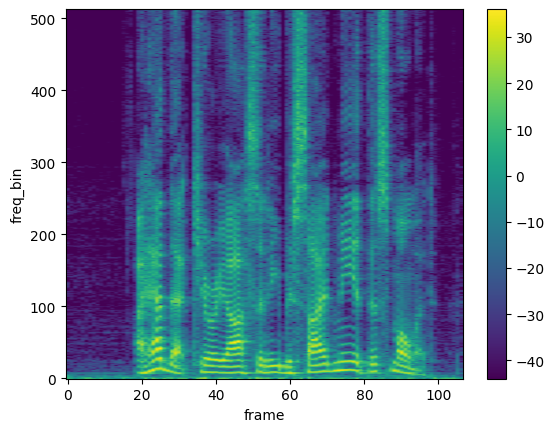

In [7]:
# Spectogram: Get the frequency as it varies with time

n_fft = 1024 #lenght of the windowed signal after padding wtih zeros
win_length = None
hop_length = 512

# Define Transform

spectrogram = Trans.Spectrogram(
    n_fft = n_fft,
    win_length= win_length,
    hop_length = hop_length,
    center= True,
    pad_mode="reflect",
    power=2.0,
)
# power=2.0 -> power=2.0: wav -> power spectogram (real valued (refer to image))

# perfome the transfomation ()
spect_gen = spectrogram(SPEECH_WAVEFORM) #new generated spectogram
#plotting 

def plot_spectrogram(specgram, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

plot_spectrogram(spect_gen[0])

Mel Spectrogram

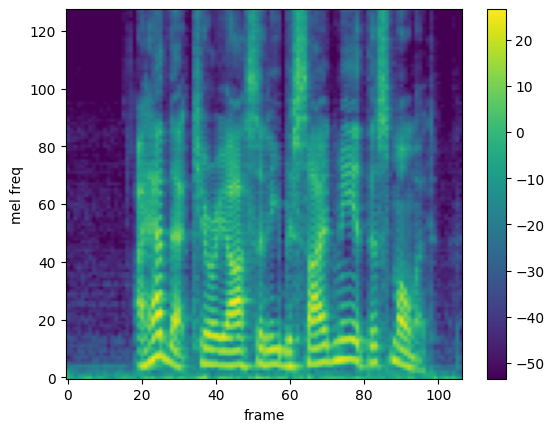

In [8]:
# generate a mel spectrogram -> perfome mle scale conversions

n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128
sample_rate = 6000

mel_spectrogram = Trans.MelSpectrogram(
    n_fft = n_fft,
    sample_rate=sample_rate,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm = "slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

melspectrogram = mel_spectrogram(SPEECH_WAVEFORM) # transform the wav (time domain) to mel (freq)
plot_spectrogram(melspectrogram[0], ylabel="mel freq")

MFCC

In [12]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = Trans.MFCC(
    sample_rate = sample_rate,
    n_mfcc = n_mfcc,
    melkwargs={
        "n_fft":n_fft,
        "n_mels":n_mels,
        "hop_length":hop_length,
        "mel_scale":"htk",
    },

)

mfcc = mfcc_transform(SPEECH_WAVEFORM)
# plot_spectrogram(mfcc[0])

PITCH